In [273]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.stem.porter import PorterStemmer
# nltk.download('stopwords')
# nltk.download('webtext')
from nltk.corpus import stopwords,webtext
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

In [303]:
data = pd.read_csv('resumes_data.csv')
del data['Unnamed: 0']
#data['ind'] = data.index
data.shape

(71, 2)

In [304]:
data.head()

,resume_name,resume_description
0,Reactjs Developer_Ranga Gaganam_Musquare Techn...,Ranga Gaganam Professional Summary Professiona...
1,Peoplesoft Admin_Vinod Akkala.doc,bjbjb Vinod Akkala PeopleSoft DBA Admin Profes...
2,Hima Mendu_Hexaware.doc,bjbjb HIMA MENDU Career Objective continue gro...
3,MooraboyinaGuravaiah_Hexaware.docx,Mooraboyina Guravaiah Workday Integration Spec...
4,RameshP_Hexaware.docx,Ramesh A Workday HCM Consultant PROFESSIONAL S...


In [44]:
# data['skill'] = ''
# category = ['React','Java','SQL']
# for i in data.values:
#     for x in category:
#         if i[0].lower().find(x.lower()) != -1:
#             data.loc[i[2],'skill'] = x

In [305]:
cleaned_corpus = [] #to store cleaned corpus
ps = PorterStemmer() ##for stemming

for i in data['resume_description']:
    #removing all puntuation marks,numbers and normalizing the corpus
    cleaned = re.sub('^[a-zA-Z]',' ',i).lower()
    
    ##create tokesns
    cleaned = cleaned.split()
    
    #appling stemming and removing stop wordrs
    cleaned = [ps.stem(word) for word in cleaned if word not in stopwords.words('english')]
    
    # join the whole document again
    cleaned = ' '.join(cleaned)
    
    cleaned_corpus.append(cleaned)
    
    
len(cleaned_corpus)

71

In [277]:
cleaned_corpus[0]

'anga gaganam profession summari profession summari year success experi phase softwar develop life cycl sdlc react js develop javascript profession experi profession experi experi design configur implement develop mainten support react js develop meet busi need good work knowledg react hook javascript html develop new user face featur use react js build reusabl compon front end librari futur use strong profici javascript includ dom manipul thorough understand react js core principl familiar newer specif ecma script proactiv learner adopt emerg trend address industri requir achiev organiz object good commun present interperson skill project experi project experi project titl e care manag system organ metrolab servic pvt ltd design junior ui develop technolog reactj html css javascript summari applic sever modul like employe patient admiss lab manag prescript pharmaci manag ot manag role respons develop ui compon web applic develop signup page project login authent use firebas e care man

In [306]:
vectorizer = CountVectorizer(max_features=2500)
X = vectorizer.fit_transform(cleaned_corpus).toarray()
X.shape

(71, 2500)

In [307]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Optimizing K value

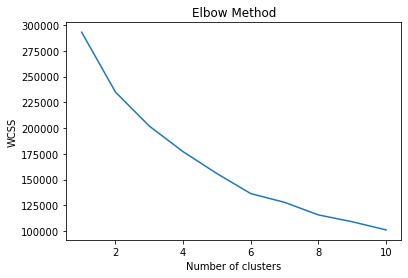

In [318]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

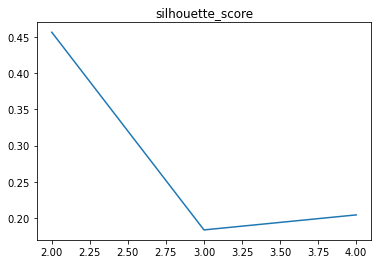

In [330]:
range_n_clusters = [2,3,4]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    k_means = KMeans(n_clusters=num_clusters,random_state=12)
    k_means.fit(X)
    cluster_labels = k_means.labels_
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
 
 # silhouette score

plt.plot(range_n_clusters,silhouette_avg) 
plt.title('silhouette_score')
plt.show()

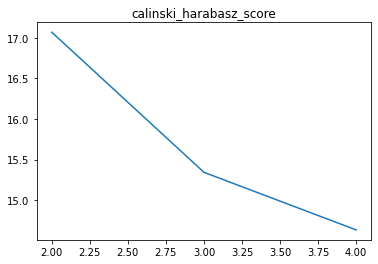

In [331]:
# K-Means
cal_score = []
for i in range(2,5):
    k_means = KMeans(n_clusters=i, random_state=1).fit(X)
    labels = k_means.labels_
    cal_score.append(calinski_harabasz_score(X, labels))
    
plt.plot(range_n_clusters,cal_score)
plt.title('calinski_harabasz_score')
plt.show()

### lets take k=3,3 clusters

In [351]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(X)

KMeans(n_clusters=4, random_state=42)

In [352]:
#Assign clusters to the data set
data['clusterid_new'] = clusters_new.labels_

In [353]:
data['clusterid_new'].unique()

array([0, 1, 2, 3], dtype=int32)

In [354]:
data[data['clusterid_new']==0]

,resume_name,resume_description,clusterid_new
0,Reactjs Developer_Ranga Gaganam_Musquare Techn...,Ranga Gaganam Professional Summary Professiona...,0
2,Hima Mendu_Hexaware.doc,bjbjb HIMA MENDU Career Objective continue gro...,0
6,React Developer_Pragnya.docx,PRAGNYA PATTNAIK Expertise Having around years...,0
7,Peoplesoft Finance_Arun Venu.doc,bjbjb Arun Venu EXPERIENCE SUMMARY Experience ...,0
9,Resume_Subha Santosh_Peoplesoft FSCM.docx,C O N T A C T Address Manyata Tech Park Nagava...,0
10,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...,SHAIK ABDUL SHARUK years Experience in Wipro C...,0
11,Ramalakshmi K.docx,resume Ramalakshmi K Career Objective Professi...,0
12,React Developer_Thirupathiamma.docx,Thirupathamma Balla SUMMARY year of IT experie...,0
13,Peoplesoft FSCM_R Ahmed.doc,bjbjb Ahmed PeopleSoft Technical Consultant PR...,0
14,React Developer_PavasGoswami.doc,bjbjb SHAPE MERGEFORMAT PROFILE Searching for ...,0


In [355]:
data[data['clusterid_new']==1]

,resume_name,resume_description,clusterid_new
1,Peoplesoft Admin_Vinod Akkala.doc,bjbjb Vinod Akkala PeopleSoft DBA Admin Profes...,1
21,Peoplesoft Admin_srinivasarao.doc,bjbjb PEOPLESOFT Administrator SRINIVAS Experi...,1
29,PeopleSoft DBA_Ganesh Alladi.doc,bjbjb PeopleSoft Admin PeopleSoft DBA Ganesh A...,1
48,Peoplesoft Admin_Varkala Vikas.docx,PeopleSoft Admin VARKALA VIKAS Career Objectiv...,1
55,PeopleSoft DBA_Vivekanand Sayana.docx,PeopleSoft Administration Vivekanand Sayana Ca...,1


In [356]:
data[data['clusterid_new']==2]

,resume_name,resume_description,clusterid_new
3,MooraboyinaGuravaiah_Hexaware.docx,Mooraboyina Guravaiah Workday Integration Spec...,2
4,RameshP_Hexaware.docx,Ramesh A Workday HCM Consultant PROFESSIONAL S...,2
8,Himaja G_(Hexaware).docx,G Himaja Career Objective To work towards achi...,2
16,Naresh Babu Cherukuri_Hexaware.doc,bjbjb Name Naresh Babu Cherukuri Objective tak...,2
17,Gopi Krishna_Hexaware.docx,Name Gopi Krishna Reddy PROFESSIONAL SUMMERY W...,2
19,ShireeshKumar_Hexaware.doc,bjbjb Shireesh Balasani HCM Consultant PROFILE...,2
20,Srikanth-Hexaware.docx,Srikanth WORKDAY hCM Consultant Seeking suitab...,2
31,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M DOB th March Nationality ...,2
34,SSKumar_Hexaware.docx,WORKDAY HCM FCM Name Kumar S S Role Workday Co...,2
40,Venkateswarlu B_Hexaware.doc,bjbjb Venkateswarlu Workday Consultant Having ...,2


In [357]:
data[data['clusterid_new']==3]

,resume_name,resume_description,clusterid_new
5,React JS Developer_AnjaniPriyadarshini.doc,bjbjb CURRICULUM VITAE Anjani Priyadarshini We...,3


### Finding Frequency of words

## determining the lable for cluster 3

In [361]:
test_resume = data[data['clusterid_new']==3]
test_resume.reset_index(drop=True,inplace=True)
test_resume = test_resume['resume_description'][0]


[nltk_data] Downloading package webtext to
[nltk_data]     /Users/vp054179/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


['bjbjb', 'CURRICULUM', 'VITAE', 'Anjani', ...]
AUDIO: 1
AUee: 1
Able: 1
AiRvr: 1
Also: 4
Analyst: 1
Android: 2
Angular: 2
Anjani: 2
Anything: 1
Application: 1
Appropriate: 1
Architecture: 3
Aspiring: 1
Bootstrap: 3
Browser: 1
Built: 1
CURRICULUM: 1
Challenges: 5
Charge: 2
City: 2
Client: 1
Command: 1
Company: 2
Compatibility: 1
Completed: 1
Content: 2
Contribution: 4
Conversion: 1
Converting: 1
CorelDraw: 1
Created: 1
Cross: 1
Current: 3
Date: 1
Deepchand: 2
Description: 6
Design: 6
Designing: 3
Designs: 3
Details: 4
Determined: 1
Developer: 7
Developing: 1
Development: 2
Document: 2
Dreamweaver: 1
Duration: 7
Eclipse: 1
Education: 1
Employing: 1
Enable: 1
Engineer: 1
Estimations: 1
Events: 1
Experience: 4
Experiences: 1
Expertise: 1
FANATICS: 1
FOSGATE: 1
February: 1
Federal: 1
Female: 1
Fonts: 1
Forms: 1
Fosgate: 1
Foundation: 2
Framework: 3
Frameworks: 1
Friendly: 1
Front: 1
Gandhi: 1
Giving: 1
Guide: 1
HDuAL: 1
HLINKS: 1
HTML: 7
HYPERLINK: 2
Hands: 1
Hardworking: 1
Having: 1
Highl

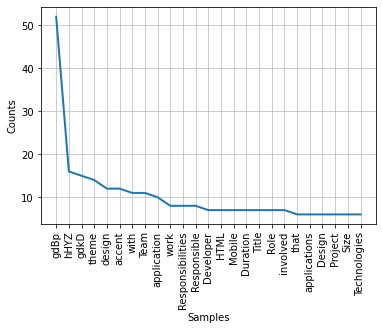

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [362]:
text_file = open("/Users/vp054179/nltk_data/corpora/webtext/sample.txt", "w")
n = text_file.write(test_resume)
text_file.close()
 
nltk.download('webtext')

wt_words = webtext.words("/Users/vp054179/nltk_data/corpora/webtext/sample.txt")
print(wt_words)
data_analysis = nltk.FreqDist(wt_words)
 
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
 
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))
 
data_analysis = nltk.FreqDist(filter_words)
 
data_analysis.plot(25, cumulative=False)

### Cluster 3 is PeopleSoft

### Determining the lable for cluster 2

In [364]:
test_resume = data[data['clusterid_new']==2]
test_resume.reset_index(drop=True,inplace=True)
test_resume = test_resume['resume_description'][0]


['Mooraboyina', 'Guravaiah', 'Workday', 'Integration', ...]
Absence: 1
Account: 1
Advanced: 2
Application: 3
BIRT: 1
Bachelor: 1
Benefit: 1
Benefits: 1
Birth: 1
Building: 2
CARRIER: 1
Calculated: 3
Change: 1
Cloud: 1
Code: 2
Compensation: 1
Completed: 1
Component: 1
Connector: 4
Connectors: 3
Consultant: 3
Core: 9
Created: 2
Crystal: 1
Currently: 1
Custom: 3
Customized: 2
DETAILS: 1
Danaiah: 1
Dashboards: 1
Date: 4
Declaration: 1
Definition: 1
Design: 3
Designation: 2
Designed: 1
Details: 1
Developed: 3
Development: 1
Document: 3
EDUCATION: 1
ENVIRONMENT: 1
Editor: 1
Engine: 1
Enhancement: 3
Excel: 2
Excellent: 1
Experience: 2
Experienced: 1
Expert: 1
Expertise: 2
FSCM: 1
Father: 1
Fields: 4
File: 3
Functional: 1
Gender: 1
Global: 6
Good: 3
Groups: 1
Guravaiah: 2
Hands: 1
Have: 4
Having: 1
Inbound: 2
Indian: 1
Integration: 1
Integrations: 2
Interface: 1
Interfaces: 1
Involved: 4
Jade: 3
Knowledge: 1
Layout: 2
Lower: 1
Maintain: 1
Male: 1
Manage: 1
Managed: 1
Management: 1
Marital: 1
Ma

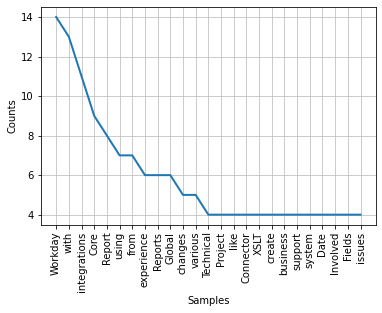

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [365]:
text_file = open("/Users/vp054179/nltk_data/corpora/webtext/sample2.txt", "w")
n = text_file.write(test_resume)
text_file.close()
 


wt_words = webtext.words("/Users/vp054179/nltk_data/corpora/webtext/sample2.txt")
print(wt_words)
data_analysis = nltk.FreqDist(wt_words)
 
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
 
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))
 
data_analysis = nltk.FreqDist(filter_words)
 
data_analysis.plot(25, cumulative=False)

### Cluster 2 is  React 

### Determining the lable of cluster 1

In [366]:
test_resume = data[data['clusterid_new']==1]
test_resume.reset_index(drop=True,inplace=True)
test_resume = test_resume['resume_description'][0]


[nltk_data] Downloading package webtext to
[nltk_data]     /Users/vp054179/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


['bjbjb', 'Vinod', 'Akkala', 'PeopleSoft', 'DBA', ...]
ALTER: 5
ALTERAUDIT: 1
APPLICATION: 1
APPLICATIONS: 1
AUee: 1
Admin: 12
Administration: 3
Administrator: 7
AiRvr: 1
Akkala: 1
Analysis: 3
Andhra: 1
Application: 24
ApplicationDesigner: 1
Applications: 1
Applying: 5
April: 3
Architecture: 3
Assistant: 7
Audit: 9
Audits: 4
August: 3
Backup: 1
Backups: 8
Bangalore: 4
Books: 3
Broker: 4
Bundles: 4
COBOL: 2
CONFIG: 2
Capacity: 1
Certificates: 1
Change: 7
ChangeAssistant: 1
Checking: 6
Client: 5
Cloning: 1
Company: 1
Compare: 6
Compilation: 2
Computer: 1
Configuration: 2
Configure: 1
Configured: 4
Configuring: 5
Content: 2
Control: 2
Corporation: 1
Create: 4
Created: 2
Creating: 3
DATABASE: 1
DDDAUDIT: 2
DEMO: 2
Data: 8
Database: 36
Databases: 2
Datapump: 4
Date: 4
Demo: 1
Disk: 1
Document: 2
Domains: 9
Duration: 5
EDUCATIONAL: 1
EXPERIENCE: 4
Elmer: 1
Enterprise: 2
Environment: 5
Executing: 5
Experience: 48
Experienced: 5
Exports: 4
FSCM: 12
Finance: 1
Financials: 1
Gateway: 1
Generatin

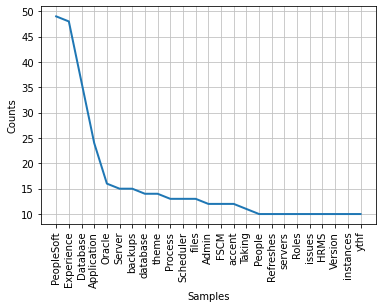

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [367]:
text_file = open("/Users/vp054179/nltk_data/corpora/webtext/sample3.txt", "w")
n = text_file.write(test_resume)
text_file.close()
 
nltk.download('webtext')

wt_words = webtext.words("/Users/vp054179/nltk_data/corpora/webtext/sample3.txt")
print(wt_words)
data_analysis = nltk.FreqDist(wt_words)
 
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
 
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))
 
data_analysis = nltk.FreqDist(filter_words)
 
data_analysis.plot(25, cumulative=False)

### cluster 1 is PeopleSoft

### Determining the lable of cluster 0

In [369]:
test_resume = data[data['clusterid_new']==0]
test_resume.reset_index(drop=True,inplace=True)
test_resume = test_resume['resume_description'][0]


[nltk_data] Downloading package webtext to
[nltk_data]     /Users/vp054179/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


['Ranga', 'Gaganam', 'Professional', 'Summary', ...]
Admission: 1
Bachelor: 2
Bootstrap: 2
Branch: 2
Building: 1
Cycle: 1
Declaration: 2
Degree: 2
Designation: 1
Developed: 2
Developer: 5
Developing: 1
Development: 1
Doctor: 1
ECMA: 1
Educational: 2
Employee: 1
Experience: 7
Familiarity: 1
Gaganam: 3
Good: 2
HTML: 4
Having: 1
Hooks: 3
Hyderabad: 4
JAVASCRIPT: 1
JavaScript: 5
Jawaharlal: 2
July: 2
Junior: 1
Knowledge: 4
Libraries: 2
Life: 1
METROLABS: 2
Management: 2
Metrolabs: 1
Nehru: 2
Organizer: 1
PROJECT: 1
Patients: 1
Pharmacy: 1
Physical: 1
Present: 2
Professional: 4
Proficiency: 2
Profile: 2
Project: 2
REACTJS: 1
Ranga: 3
React: 5
ReactJS: 2
Redux: 2
Responsibilities: 1
Roles: 1
SASS: 2
SDLC: 1
SERVICES: 2
Script: 1
Services: 1
Sheets: 2
Software: 1
Strong: 1
Style: 2
Summary: 3
System: 1
Technical: 2
Technician: 1
Technological: 2
Technologies: 3
Thorough: 1
Title: 1
University: 2
Working: 4
above: 2
accountant: 1
achieve: 1
addressing: 1
admin: 1
adopting: 1
application: 4
aut

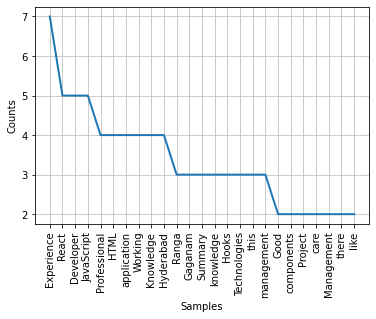

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [370]:
text_file = open("/Users/vp054179/nltk_data/corpora/webtext/sample4.txt", "w")
n = text_file.write(test_resume)
text_file.close()
 
nltk.download('webtext')

wt_words = webtext.words("/Users/vp054179/nltk_data/corpora/webtext/sample4.txt")
print(wt_words)
data_analysis = nltk.FreqDist(wt_words)
 
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
 
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))
 
data_analysis = nltk.FreqDist(filter_words)
 
data_analysis.plot(25, cumulative=False)

### Cluster 0 is React